In [1]:
import numpy as np
from sklearn import datasets

In [11]:
iris = datasets.load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn import preprocessing
from keras.utils import np_utils

前処理


In [10]:
scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)
x = scaler.transform(iris.data)
print(x[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]


In [12]:
t = np_utils.to_categorical(iris.target)
print(t[:10])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


訓練データとテストデータ

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,t_train,t_test = train_test_split(x,t,train_size = 0.75)

モデルの構築

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

model = Sequential()
model.add(Dense(32,input_dim = 4))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer = 'sgd',loss = 'categorical_crossentropy',metrics=["accuracy"])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 activation_4 (Activation)   (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
 activation_5 (Activation)   (None, 3)                 0         
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-traina

学習

In [16]:
history = model.fit(x_train,t_train,epochs = 30,batch_size = 8)

Epoch 1/30
14/14 [==============================] - 1s 3ms/step - loss: 1.1794 - accuracy: 0.1607
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 1.0662 - accuracy: 0.5625
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9778 - accuracy: 0.6696
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9010 - accuracy: 0.6964
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8334 - accuracy: 0.7143
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7752 - accuracy: 0.7411
Epoch 7/30
14/14 [==============================] - 0s 3ms/step - loss: 0.7231 - accuracy: 0.7589
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.7768
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6385 - accuracy: 0.8036
Epoch 10/30
14/14 [==============================] - 0s 3ms/step - loss: 0.6036 - accuracy: 0.8036
Epoch 11/30
14/14 [

学習の推移

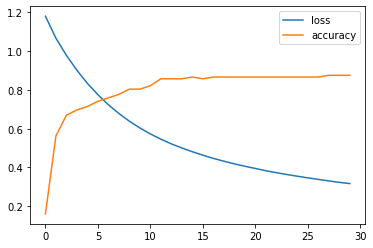

In [20]:
import matplotlib.pyplot as plt
hist_loss = history.history["loss"]
hist_acc = history.history["accuracy"]
plt.plot(np.arange(len(hist_loss)),hist_loss,label = 'loss')
plt.plot(np.arange(len(hist_acc)),hist_acc,label = 'accuracy')
plt.legend()
plt.show()

モデルの評価

In [23]:
loss,accuracy = model.evaluate(x_test,t_test)
print("誤差:",loss,"精度：",accuracy)

2/2 [==============================] - 0s 6ms/step - loss: 0.3440 - accuracy: 0.9474
誤差: 0.3439610004425049 精度： 0.9473684430122375


予測

In [25]:
y_test = model.predict(x_test)
print(y_test[:10])

2/2 [==============================] - 0s 7ms/step
[[0.04435254 0.2506786  0.70496887]
 [0.07506212 0.31922793 0.6057098 ]
 [0.9963728  0.00175873 0.00186842]
 [0.10879319 0.584683   0.30652386]
 [0.0410049  0.3497515  0.6092436 ]
 [0.10303248 0.4667643  0.43020323]
 [0.10225929 0.5163222  0.3814185 ]
 [0.99458605 0.00302732 0.00238664]
 [0.11038705 0.4818467  0.40776628]
 [0.10791683 0.70068604 0.19139703]]


モデルの保存

In [27]:
from tensorflow.keras.models import load_model
model.save('model.h5')
load_model('model.h5')